In [50]:
# -- Installs -- 
!pip3 install -U ucimlrepo 
!pip3 install scikit-learn

# -- Imports --
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [24]:
# -- Setup -- 

# Fetch dataset
phiusiil_phishing_url_website = fetch_ucirepo(id=967) 

# Get the data as pandas data frames
# The structure of the object is like a dictionary wrapper (dot dict)
# .data: Contains the actual dataset tables.
# .metadata: Contains descriptive information (like the dataset name, author, and purpose).
# .variables: Contains a DataFrame describing each column (feature, target, data type).

X = phiusiil_phishing_url_website.data.features 
y = phiusiil_phishing_url_website.data.targets 

In [56]:
# -- Data Processing --

X = X.drop(labels=['URL', 'Domain', 'TLD', 'Title'], axis=1) # Drop text data as scikit-learn does not support categorical data w/ decision trees
X = X.drop(labels=['URLSimilarityIndex'], axis=1) # Remove the similarity index, as it is a shortcut feature

KeyError: "['URL', 'Domain', 'TLD', 'Title'] not found in axis"

In [57]:
# -- Split Data -- 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# -- Fit the training data --
clf = DecisionTreeClassifier(random_state=42, max_depth=3).fit(X_train, y_train)

In [59]:
# -- Predicted y value --
y_pred = clf.predict(X_test)

In [60]:
# -- Evaluation --
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print(f'accuracy_score: {accuracy}\n')

report = classification_report(y_true=y_test, y_pred=y_pred)
print(report)

accuracy_score: 0.998840809171744

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30151
           1       1.00      1.00      1.00     40588

    accuracy                           1.00     70739
   macro avg       1.00      1.00      1.00     70739
weighted avg       1.00      1.00      1.00     70739



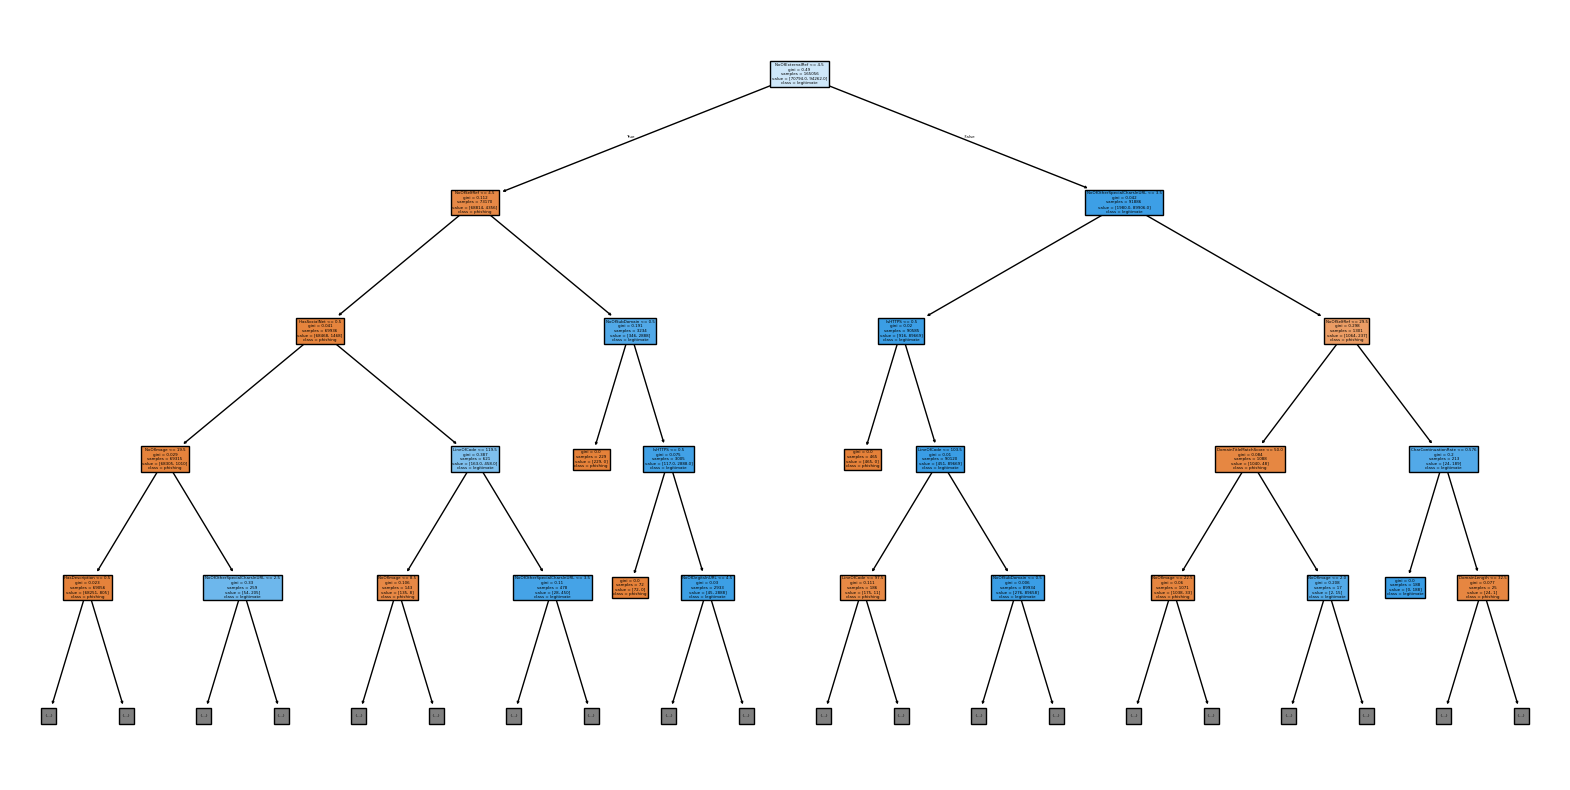

In [ ]:
# -- Plot -- 
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X_train.columns, class_names=['phishing', 'legitimate'], filled=True)
plt.show()

In [ ]:
display(phiusiil_phishing_url_website.variables)

,name,role,type,demographic,description,units,missing_values
0,FILENAME,Other,Categorical,None,None,None,no
1,URL,Feature,Categorical,None,None,None,no
2,URLLength,Feature,Integer,None,None,None,no
3,Domain,Feature,Categorical,None,None,None,no
4,DomainLength,Feature,Integer,None,None,None,no
5,IsDomainIP,Feature,Integer,None,None,None,no
6,TLD,Feature,Categorical,None,None,None,no
7,URLSimilarityIndex,Feature,Integer,None,None,None,no
8,CharContinuationRate,Feature,Integer,None,None,None,no
9,TLDLegitimateProb,Feature,Continuous,None,None,None,no
